In [1]:
import os
os.chdir("C:\\Users\\Venki\\Desktop\\data science\\All data")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import metrics
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Company Data

In [3]:
CD=pd.read_csv('Company_Data.csv')

In [4]:
CD.head(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
8,6.54,132,110,0,108,124,Medium,76,10,No,No
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes


# EDA, Data Visualisation

In [5]:
CD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
CD.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [7]:
CD[CD.duplicated()].shape

(0, 11)

In [8]:
CD.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

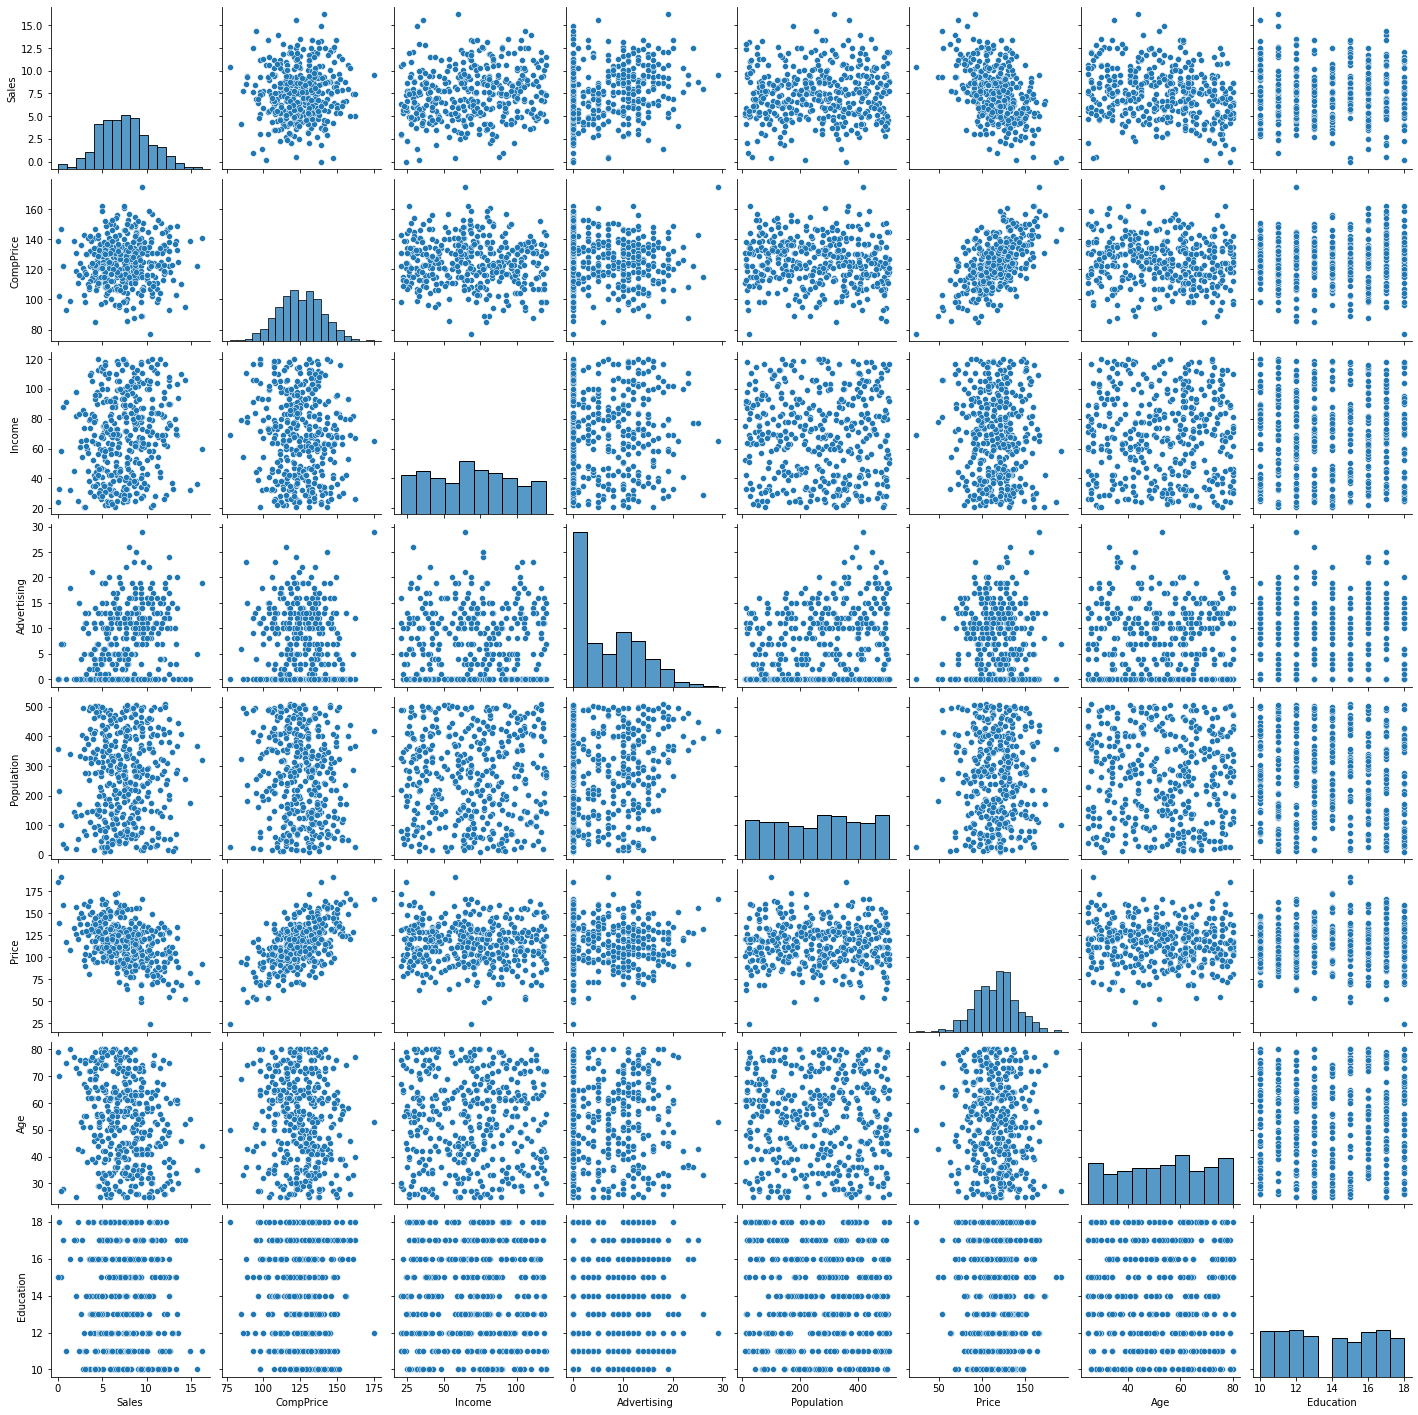

In [10]:
sns.pairplot(CD)

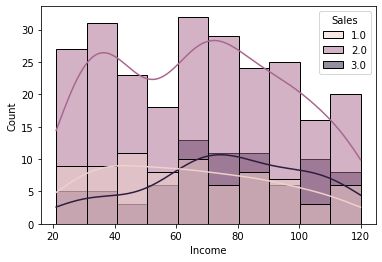

In [34]:
sns.histplot(x='Income', data=CD1, kde=True, hue='Sales');

In [11]:
CD.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


In [12]:
CD1=CD.copy()

In [13]:
CD1

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [14]:
label_encoder = preprocessing.LabelEncoder()
CD1['Urban']=label_encoder.fit_transform(CD['Urban'])
CD1['US']=label_encoder.fit_transform(CD['US'])
CD1['ShelveLoc']=label_encoder.fit_transform(CD['ShelveLoc'])

In [15]:
CD1

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [16]:
def Sales(data):
    data.loc[data['Sales']<=5,'Sales']=1
    data.loc[(data['Sales']>5)&(data['Sales']<=10),'Sales']=2
    data.loc[data['Sales']>10,'Sales']=3
    return data
Sales(CD1);

In [33]:
CD1

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,2.0,138,73,11,276,120,0,42,17,1,1
1,3.0,111,48,16,260,83,1,65,10,1,1
2,3.0,113,35,10,269,80,2,59,12,1,1
3,2.0,117,100,4,466,97,2,55,14,1,1
4,1.0,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,3.0,138,108,17,203,128,1,33,14,1,1
396,2.0,139,23,3,37,120,2,55,11,0,1
397,2.0,162,26,12,368,159,2,40,18,1,1
398,2.0,100,79,7,284,95,0,50,12,1,1


In [18]:
x=CD1.iloc[:,1:]
y=CD1['Sales']

In [19]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [20]:
y

0      2.0
1      3.0
2      3.0
3      2.0
4      1.0
      ... 
395    3.0
396    2.0
397    2.0
398    2.0
399    2.0
Name: Sales, Length: 400, dtype: float64

In [21]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2,random_state=40)

In [22]:
x_train

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
85,125,103,0,304,112,2,49,13,0,0
69,127,59,0,339,99,2,65,12,1,0
203,131,82,0,132,157,0,25,14,1,0
379,125,111,0,404,107,0,54,15,1,0
261,121,42,4,188,118,2,54,15,1,1
...,...,...,...,...,...,...,...,...,...,...
306,131,32,1,85,133,2,48,12,1,1
165,147,58,7,100,191,0,27,15,1,1
7,136,81,15,425,120,1,67,10,1,1
219,116,79,19,359,116,1,58,17,1,1


In [23]:
y_train

85     2.0
69     2.0
203    1.0
379    2.0
261    2.0
      ... 
306    1.0
165    1.0
7      3.0
219    3.0
326    1.0
Name: Sales, Length: 320, dtype: float64

In [24]:
model= DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=5)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=5)

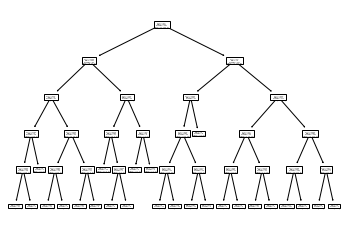

In [25]:
tree.plot_tree(model);

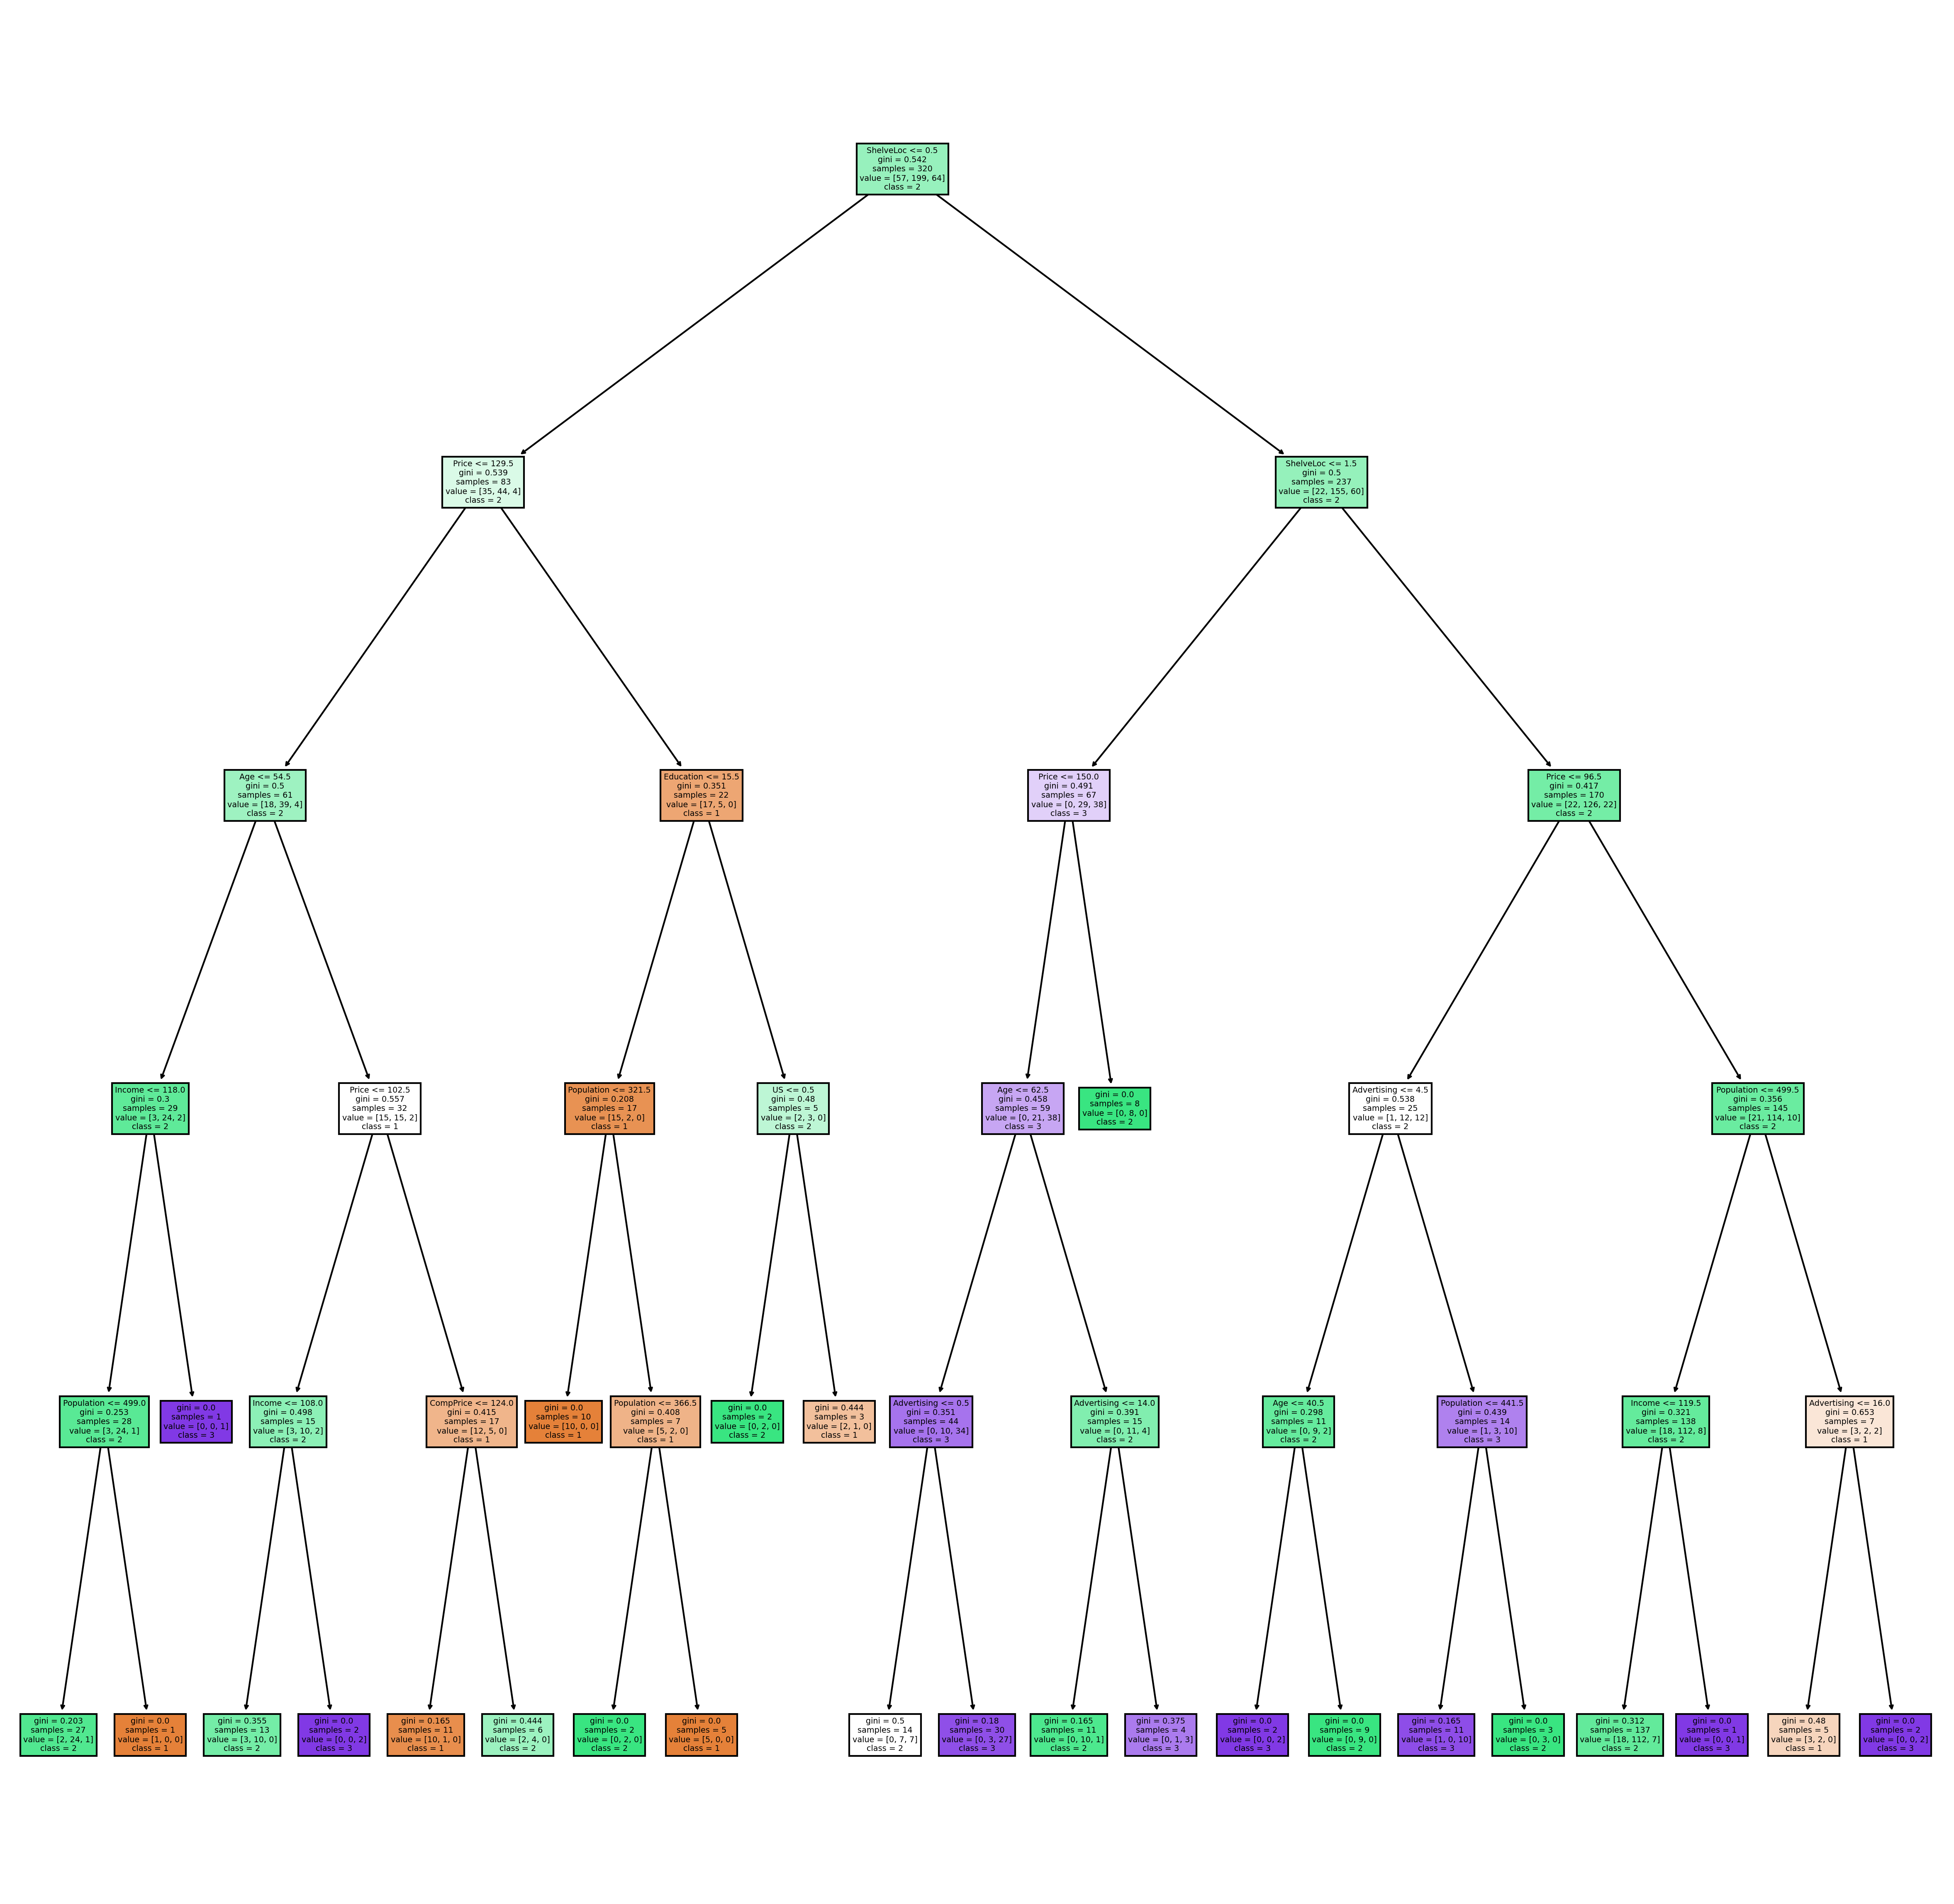

In [26]:
F=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
C=['1','2','3']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20), dpi=300)
tree.plot_tree(model,
               feature_names = F,
               class_names=C,
               filled = True);

In [27]:
preds = model.predict(x_test)
pd.Series(preds).value_counts()

2.0    58
3.0    17
1.0     5
dtype: int64

In [28]:
preds

array([2., 2., 2., 2., 2., 2., 3., 2., 2., 3., 2., 2., 2., 2., 3., 2., 2.,
       2., 2., 2., 3., 3., 2., 3., 2., 2., 3., 2., 3., 3., 2., 2., 3., 2.,
       2., 2., 3., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 3., 2., 1., 2., 2., 2., 2., 1., 2., 2., 3., 2., 1., 2., 3., 2.,
       2., 3., 3., 3., 2., 2., 2., 2., 2., 2., 2., 1.])

In [29]:
pd.crosstab(y_test,preds)

col_0,1.0,2.0,3.0
Sales,,,
1.0,3,17,0
2.0,2,35,9
3.0,0,6,8


In [30]:
np.mean(preds==y_test)

0.575

# Fraud Check

In [36]:
fc=pd.read_csv('Fraud_check.csv')

In [37]:
fc

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


# EDA, Data Visualisation

In [38]:
fc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [39]:
fc.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [40]:
fc[fc.duplicated()].shape

(0, 6)

In [41]:
fc.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [45]:
fc1=fc.rename({'Marital.Status':'MS','Taxable.Income':'TI','City.Population':'CP','Work.Experience':'WE'},axis=1)

In [46]:
fc1

,Undergrad,MS,TI,CP,WE,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [47]:
fc2 = fc1[['TI','MS','Undergrad','CP','WE','Urban']]

In [48]:
fc2

,TI,MS,Undergrad,CP,WE,Urban
0,68833,Single,NO,50047,10,YES
1,33700,Divorced,YES,134075,18,YES
2,36925,Married,NO,160205,30,YES
3,50190,Single,YES,193264,15,YES
4,81002,Married,NO,27533,28,NO
...,...,...,...,...,...,...
595,76340,Divorced,YES,39492,7,YES
596,69967,Divorced,YES,55369,2,YES
597,47334,Divorced,NO,154058,0,YES
598,98592,Married,YES,180083,17,NO


In [49]:
fc3=fc2.copy()

In [50]:
label_encoder = preprocessing.LabelEncoder()
fc3['Undergrad']=label_encoder.fit_transform(fc3['Undergrad'])
fc3['Urban']=label_encoder.fit_transform(fc3['Urban'])

In [51]:
fc3['MS'].replace(['Single','Divorced','Married'],[0,0,1],inplace=True)

In [52]:
fc3

,TI,MS,Undergrad,CP,WE,Urban
0,68833,0,0,50047,10,1
1,33700,0,1,134075,18,1
2,36925,1,0,160205,30,1
3,50190,0,1,193264,15,1
4,81002,1,0,27533,28,0
...,...,...,...,...,...,...
595,76340,0,1,39492,7,1
596,69967,0,1,55369,2,1
597,47334,0,0,154058,0,1
598,98592,1,1,180083,17,0


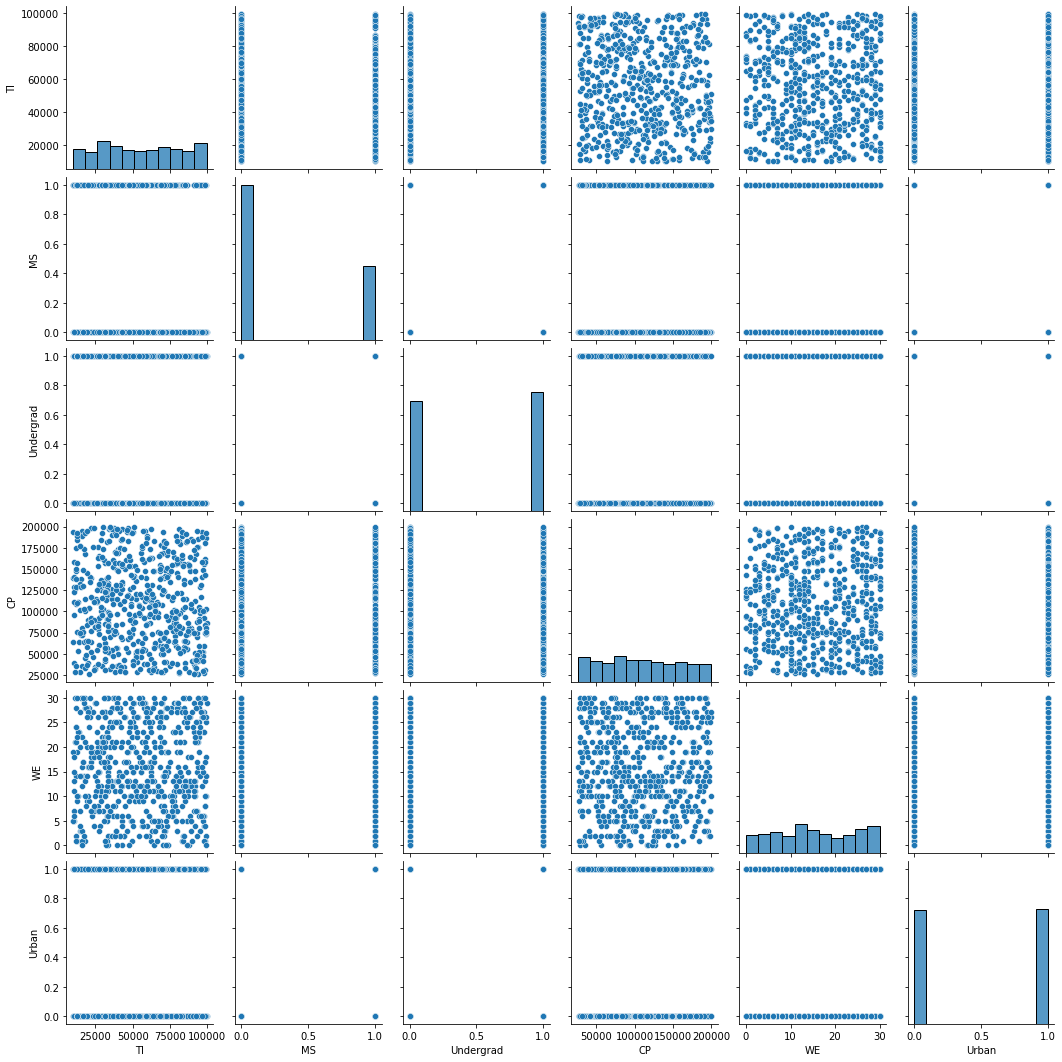

In [54]:
sns.pairplot(fc3)

In [57]:
def TI(data):
    data.loc[data['TI']<=30000,'TI']=0
    data.loc[data['TI']>30000,'TI']=1
    return data
TI(fc3);

In [58]:
fc3

,TI,MS,Undergrad,CP,WE,Urban
0,1,0,0,50047,10,1
1,1,0,1,134075,18,1
2,1,1,0,160205,30,1
3,1,0,1,193264,15,1
4,1,1,0,27533,28,0
...,...,...,...,...,...,...
595,1,0,1,39492,7,1
596,1,0,1,55369,2,1
597,1,0,0,154058,0,1
598,1,1,1,180083,17,0


In [76]:
fc3['TI'].value_counts()

1    476
0    124
Name: TI, dtype: int64

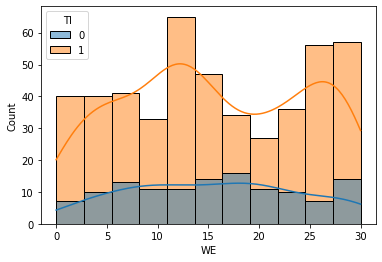

In [60]:
sns.histplot(x='WE', data=fc3, kde=True, hue='TI');

In [61]:
x=fc3.iloc[:,1:]
y=fc3['TI']

In [62]:
x

,MS,Undergrad,CP,WE,Urban
0,0,0,50047,10,1
1,0,1,134075,18,1
2,1,0,160205,30,1
3,0,1,193264,15,1
4,1,0,27533,28,0
...,...,...,...,...,...
595,0,1,39492,7,1
596,0,1,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [63]:
y

0      1
1      1
2      1
3      1
4      1
      ..
595    1
596    1
597    1
598    1
599    1
Name: TI, Length: 600, dtype: int64

In [64]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2,random_state=40)

In [65]:
x_train

,MS,Undergrad,CP,WE,Urban
332,0,1,84132,1,0
13,1,0,86649,16,1
274,1,1,112584,25,0
257,1,1,31611,17,1
112,0,1,193038,26,1
...,...,...,...,...,...
440,0,0,170407,13,1
165,1,1,38463,23,1
7,0,1,131253,3,1
219,0,1,26814,9,0


In [66]:
y_train

332    1
13     1
274    1
257    1
112    1
      ..
440    1
165    1
7      1
219    0
326    0
Name: TI, Length: 480, dtype: int64

In [67]:
model= DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=5)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=5)

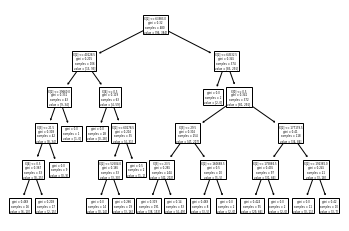

In [68]:
tree.plot_tree(model);

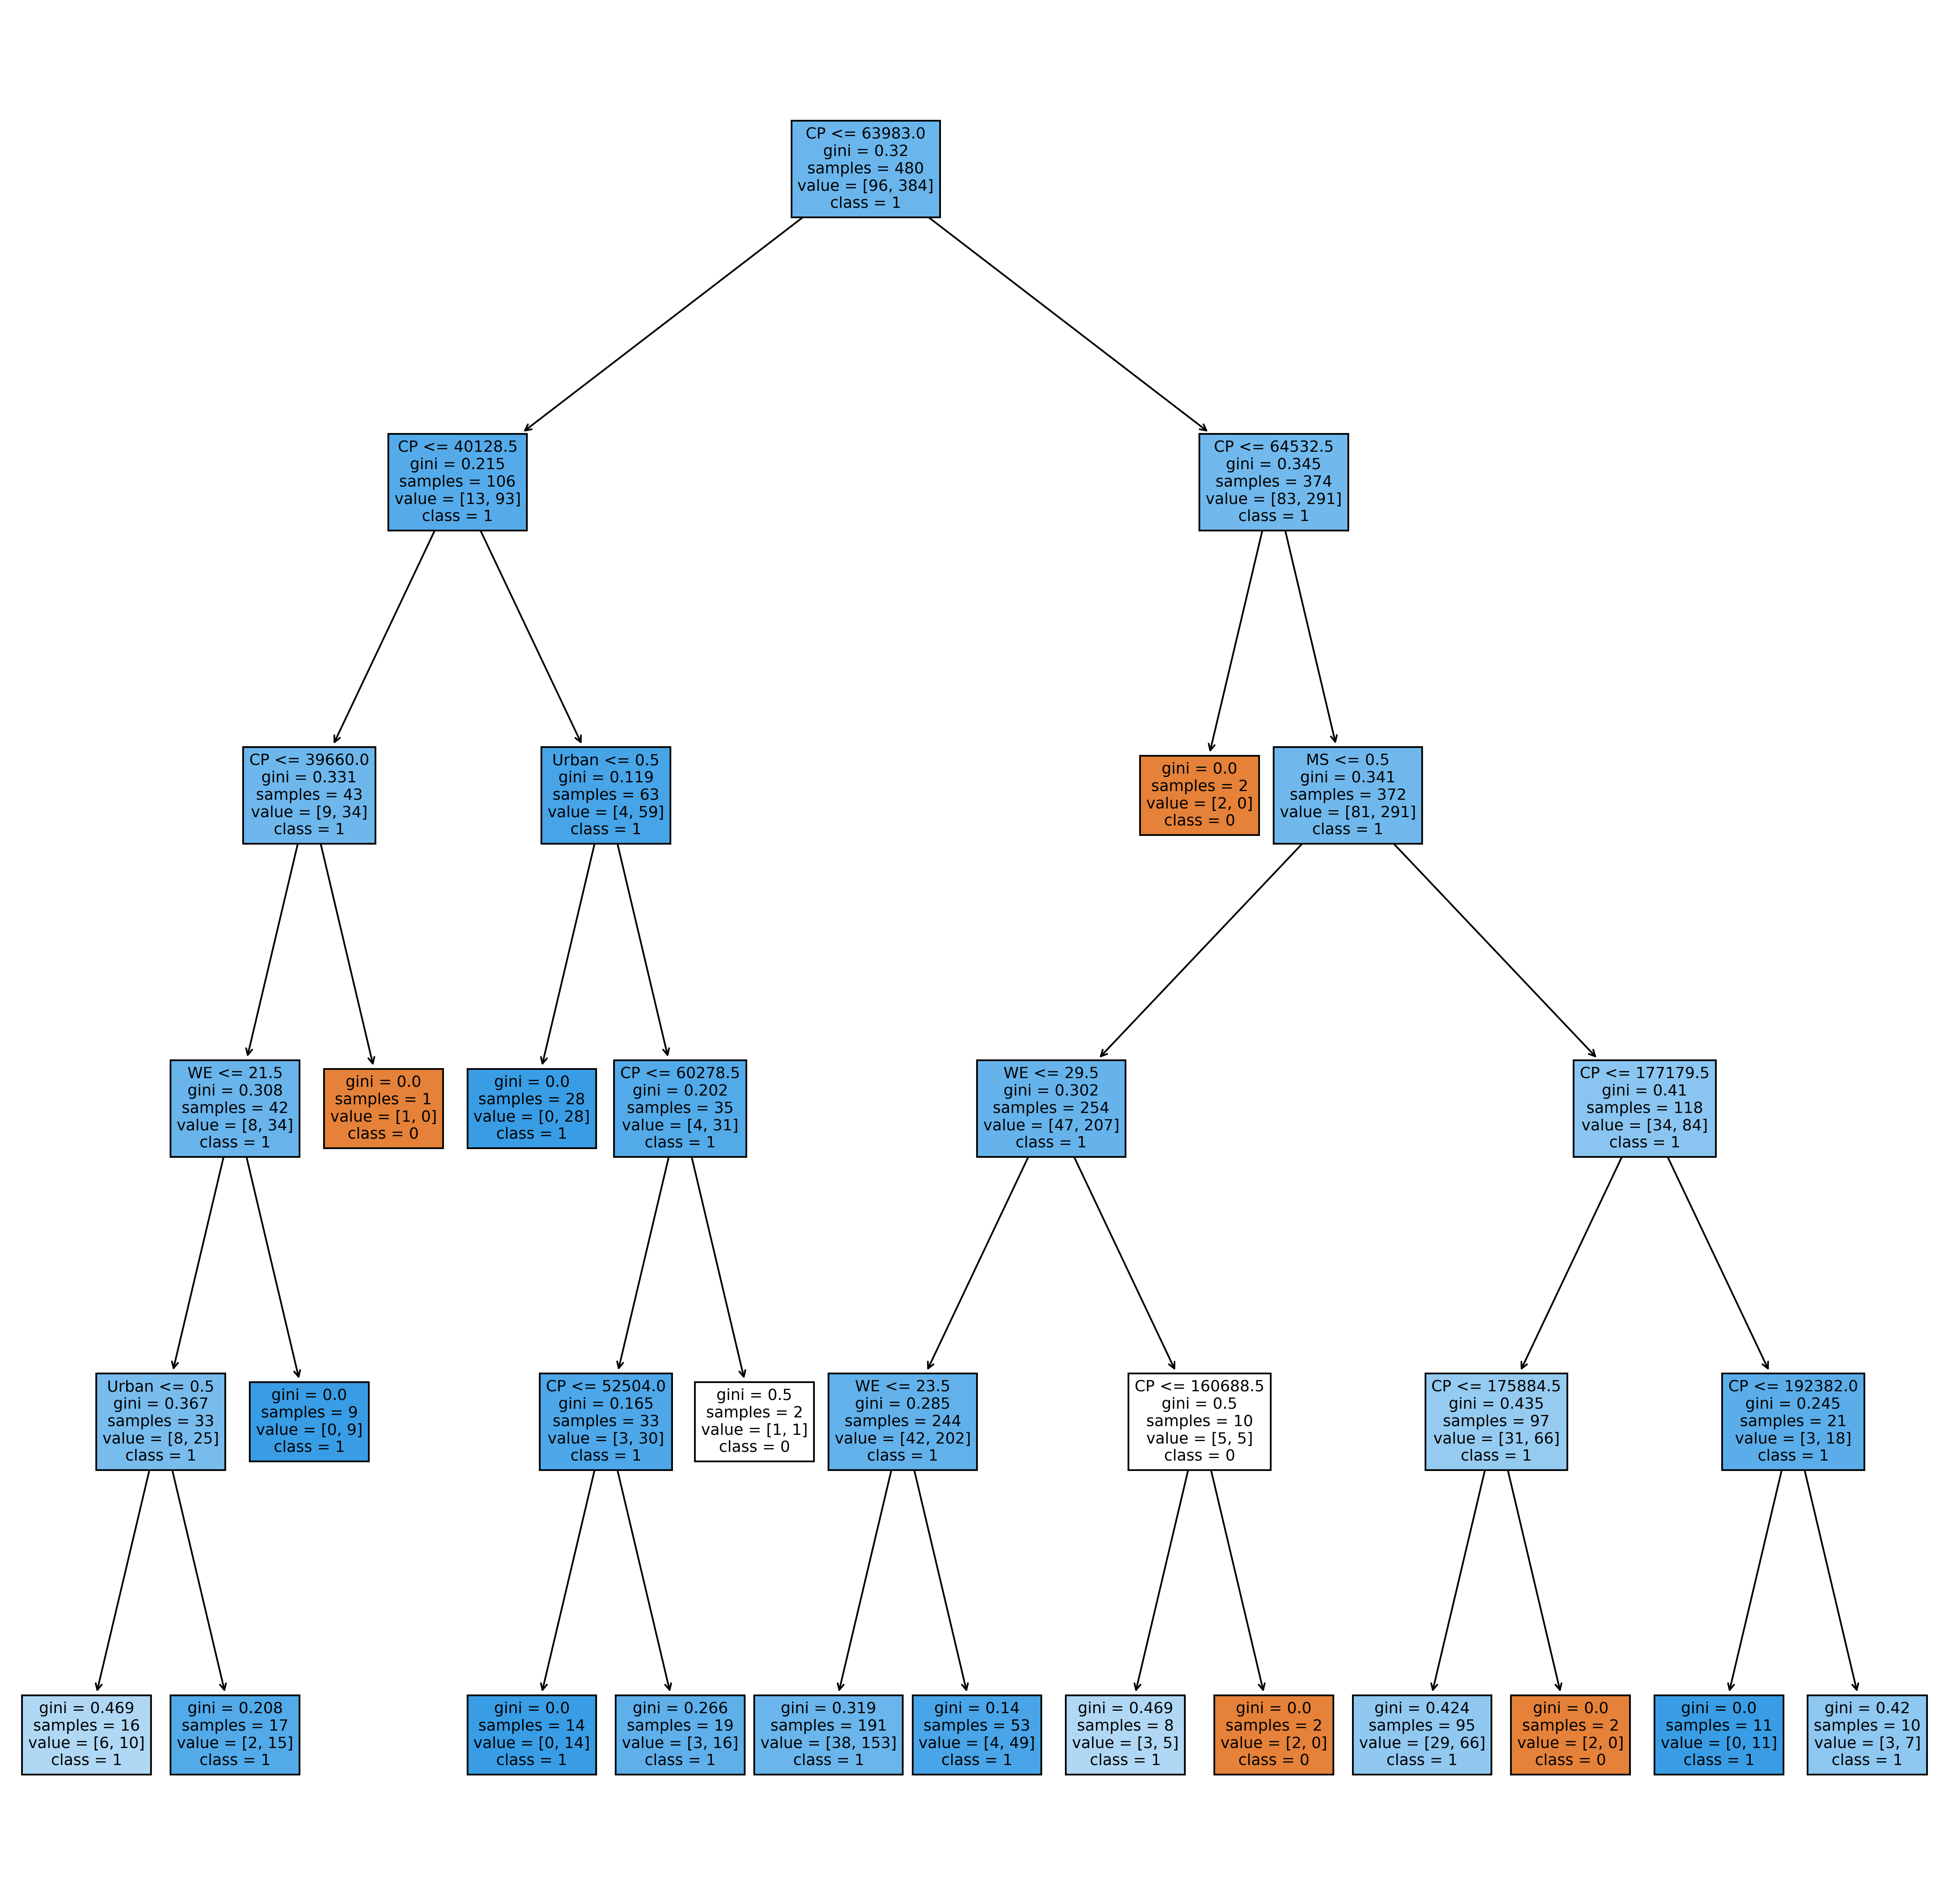

In [69]:
F=['MS','Undergrad','CP','WE','Urban',]
C=['0','1']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20), dpi=300)
tree.plot_tree(model,
               feature_names = F,
               class_names=C,
               filled = True);

In [70]:
preds = model.predict(x_test)
pd.Series(preds).value_counts()

1    116
0      4
dtype: int64

In [71]:
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [72]:
pd.crosstab(y_test,preds)

col_0,0,1
TI,,
0,1,27
1,3,89


In [73]:
np.mean(preds==y_test)

0.75